
---
# **PROYECTO: ANÁLISIS DE FACTORES ACADÉMICOS ESTUDIANTILES**

Alumno: Marcos Fernández - Data Science I 2025
--
---


## **1. Contexto**
Este conjunto de datos contiene información sobre factores que afectan el rendimiento académico de estudiantes.
Incluye variables demográficas, socioeconómicas, hábitos de estudio y características del entorno educativo.
El objetivo es identificar qué factores influyen más significativamente en el desempeño en exámenes.

## **2. Abstract**
En este proyecto trabajamos con el dataset StudentPerformanceFactors que contiene información sobre
factores demográficos, socioeconómicos, hábitos de estudio y características del entorno educativo
que pueden influir en el rendimiento académico de estudiantes.

El objetivo principal es aplicar técnicas de visualización y análisis exploratorio de datos para
identificar patrones relevantes, relaciones entre variables y posibles factores que influyen en
el desempeño en exámenes. A través de gráficos univariados, bivariados y multivariados, se buscará
responder una serie de preguntas o hipótesis planteadas sobre el comportamiento de los datos.

El análisis incluye una limpieza previa de datos, identificación de valores perdidos, y selección
de variables relevantes. Luego se desarrollan visualizaciones que permiten explorar tendencias,
distribuciones y correlaciones. A partir de estos resultados visuales y numéricos se busca brindar
una interpretación que permita entender mejor los factores que afectan el rendimiento académico.

El proyecto se estructura en etapas: definición de preguntas, diagnóstico visual, interpretación,
y preparación para análisis posteriores como modelado predictivo o segmentación de estudiantes.

## **3. Objetivo**
El objetivo principal es aplicar técnicas de visualización y análisis exploratorio de datos para
identificar patrones relevantes, relaciones entre variables y posibles factores que influyen en
el desempeño en exámenes. A través de gráficos univariados, bivariados y multivariados, se buscará
responder una serie de preguntas o hipótesis planteadas sobre el comportamiento de los datos.

## **4. Análisis**
El análisis incluye una limpieza previa de datos, identificación de valores perdidos, y selección
de variables relevantes. Luego se desarrollan visualizaciones que permiten explorar tendencias,
distribuciones y correlaciones. A partir de estos resultados visuales y numéricos se busca brindar
una interpretación que permita entender mejor los factores que afectan el rendimiento académico.

## **5. Estructura**
El proyecto se estructura en etapas: definición de preguntas, diagnóstico visual, interpretación,
y preparación para análisis posteriores como modelado predictivo o segmentación de estudiantes.

## **6. Preguntas / Hipótesis**
1. ¿Existe relación entre las horas de estudio y la puntuación en exámenes?
2. ¿Qué factores (socioeconómicos, hábitos, recursos) parecen influir más en el rendimiento académico?
3. ¿Hay grupos claramente diferenciables en función del nivel de involucramiento parental, acceso a recursos y motivación?
4. ¿Qué variable presenta mayor variabilidad en relación al rendimiento? ¿Hay outliers significativos?
5. ¿Cómo se distribuye la puntuación en exámenes según el tipo de escuela y el nivel de ingresos familiar?
6. ¿La combinación de alta motivación, buen acceso a recursos y alta asistencia resulta en mejor rendimiento?

## **7. Listado de Columnas**
Variables disponibles:
- Hours_Studied: Horas de estudio semanales
- Attendance: Porcentaje de asistencia
- Parental_Involvement: Nivel de involucramiento parental (Low/Medium/High)
- Access_to_Resources: Acceso a recursos educativos (Low/Medium/High)
- Extracurricular_Activities: Participación en actividades extracurriculares (Yes/No)
- Sleep_Hours: Horas de sueño por noche
- Previous_Scores: Puntuaciones anteriores
- Motivation_Level: Nivel de motivación (Low/Medium/High)
- Internet_Access: Acceso a internet (Yes/No)
- Tutoring_Sessions: Sesiones de tutoría
- Family_Income: Ingreso familiar (Low/Medium/High)
- Teacher_Quality: Calidad del profesor (Low/Medium/High)
- School_Type: Tipo de escuela (Public/Private)
- Peer_Influence: Influencia de compañeros (Positive/Negative/Neutral)
- Physical_Activity: Nivel de actividad física (escala 1-5)
- Learning_Disabilities: Discapacidades de aprendizaje (Yes/No)
- Parental_Education_Level: Nivel educativo de los padres
- Distance_from_Home: Distancia desde casa (Near/Moderate/Far)
- Gender: Género (Male/Female)
- Exam_Score: Puntuación en el examen (variable objetivo)

## **8. Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("Librerias cargadas!")

Librerias cargadas!


## **9. Carga del CSV**

In [2]:
url = "https://raw.githubusercontent.com/marcos-cabj/proyecto-analisis-estudiantes-Fernandez/refs/heads/main/StudentPerformanceFactors.csv"

## **10. Carga del archivo**

In [3]:
try:
    datos = pd.read_csv(url)
    print("Datos cargados correctamente!")
except:
    print("Uy, no pude cargar los datos...")
    # Por las dudas, intentemos de otra forma
    import requests
    response = requests.get(url)
    with open('temp_data.csv', 'w') as f:
        f.write(response.text)
    datos = pd.read_csv('temp_data.csv')
    print("Datos cargados de otra forma!")

Datos cargados correctamente!


## **11. Analisis del dataset**

In [4]:
print("Forma del dataset:", datos.shape)
print("Primeras filas:")
datos.head()

""" Revisamos los nombres de las columnas """

print("Columnas que tenemos:")
for col in datos.columns:
    print(f"- {col}")


""" Ver que tipos de datos tenemos """
# Chequeemos que tipos de datos son cada columna
print("Tipos de datos:")
print(datos.dtypes)

# Contar cuantos datos faltan
print("\nDatos que faltan:")
faltantes = datos.isnull().sum()
for col, cant in faltantes.items():
    if cant > 0:
        print(f"{col}: {cant} datos faltantes")

# Si hay muchos datos faltantes, podriamos tener problema
total_filas = len(datos)
print(f"\nTotal de filas: {total_filas}")

# Estadisticas basicas de las columnas numericas
print("\nEstadisticas basicas:")
datos.describe()

# Información básica del dataset
print("=== INFORMACIÓN DEL DATASET ===")
print(f"Dimensiones: {datos.shape}")
print(f"Variables: {datos.columns.tolist()}")
print("\nTipos de datos:")
print(datos.dtypes.value_counts())

# Estadísticas descriptivas iniciales
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(datos.describe())

# Valores nulos iniciales
print("=== VALORES NULOS INICIALES ===")
null_sum = datos.isnull().sum()
null_percent = (datos.isnull().sum() / len(datos)) * 100
null_info = pd.DataFrame({
    'Valores_Nulos': null_sum,
    'Porcentaje': null_percent
})
print(null_info[null_info['Valores_Nulos'] > 0])


Forma del dataset: (6607, 20)
Primeras filas:
Columnas que tenemos:
- Hours_Studied
- Attendance
- Parental_Involvement
- Access_to_Resources
- Extracurricular_Activities
- Sleep_Hours
- Previous_Scores
- Motivation_Level
- Internet_Access
- Tutoring_Sessions
- Family_Income
- Teacher_Quality
- School_Type
- Peer_Influence
- Physical_Activity
- Learning_Disabilities
- Parental_Education_Level
- Distance_from_Home
- Gender
- Exam_Score
Tipos de datos:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity          

## **12. Visualizciones**

### **12.1. Univariables**
 Vamos a hacer algunos graficos simples primero.
 -

**Empezamos con las notas de examen que es lo mas importante:**
-

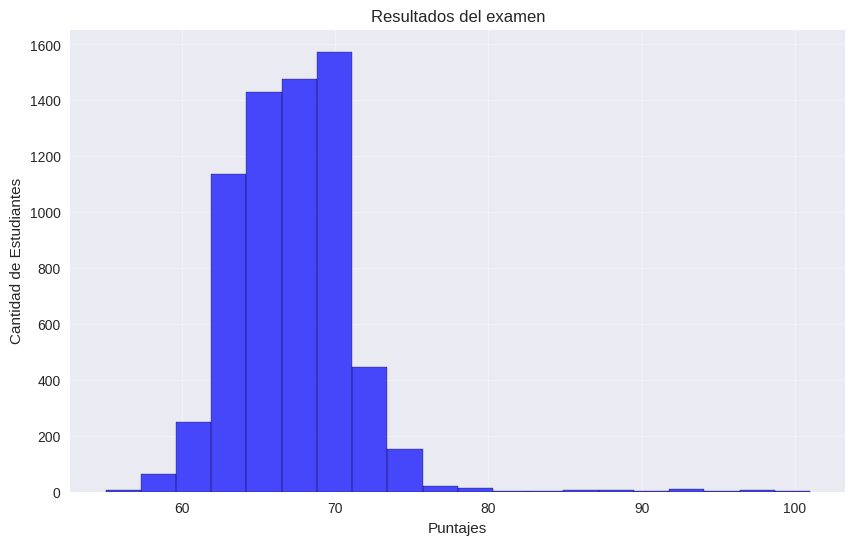

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(datos['Exam_Score'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Resultados del examen')
plt.xlabel('Puntajes')
plt.ylabel('Cantidad de Estudiantes')
plt.grid(True, alpha=0.3)
plt.show()

**Ahora nos fijamos las horas de estudio:**


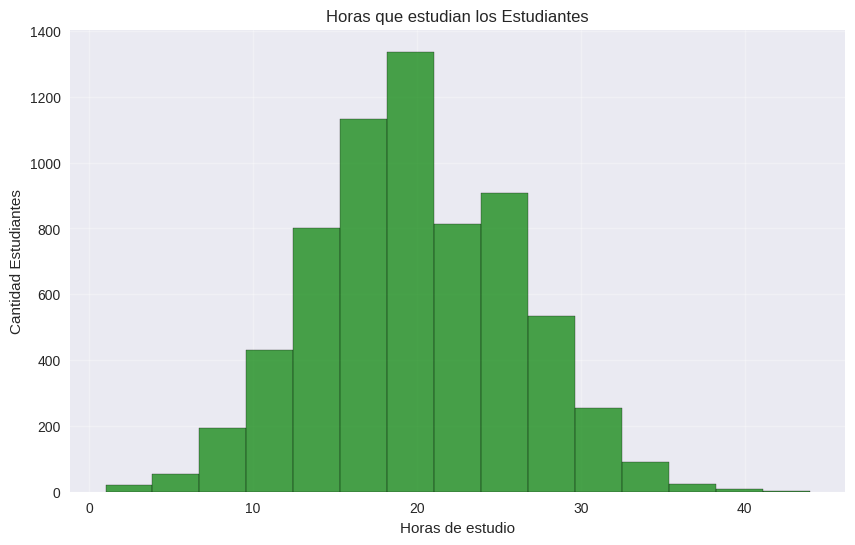

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(datos['Hours_Studied'], bins=15, color='green', alpha=0.7, edgecolor='black')
plt.title('Horas que estudian los Estudiantes')
plt.xlabel('Horas de estudio')
plt.ylabel('Cantidad Estudiantes')
plt.grid(True, alpha=0.3)
plt.show()

**Analizamos la asistencia:**


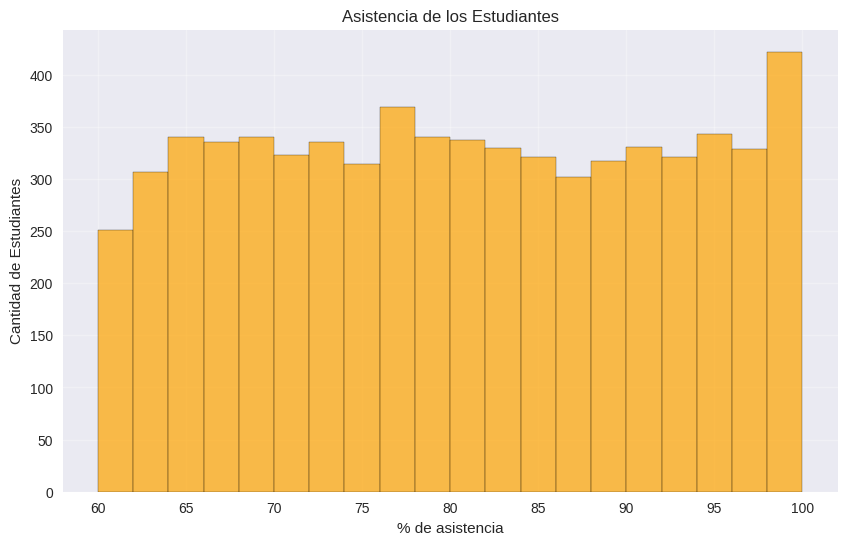

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(datos['Attendance'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Asistencia de los Estudiantes')
plt.xlabel('% de asistencia')
plt.ylabel('Cantidad de Estudiantes')
plt.grid(True, alpha=0.3)
plt.show()

**Ahora algunas variables categoricas...**

**Por ejemplo, el genero:**

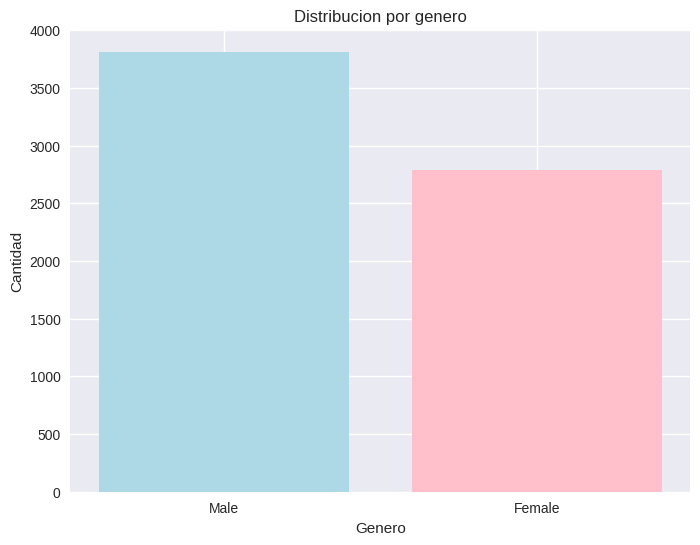

Hombres: 3814
Mujeres: 2793


In [8]:
genero_counts = datos['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(genero_counts.index, genero_counts.values, color=['lightblue', 'pink'])
plt.title('Distribucion por genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad')
plt.show()

print(f"Hombres: {genero_counts['Male']}")
print(f"Mujeres: {genero_counts['Female']}")

**La motivación de los estudiantes:**

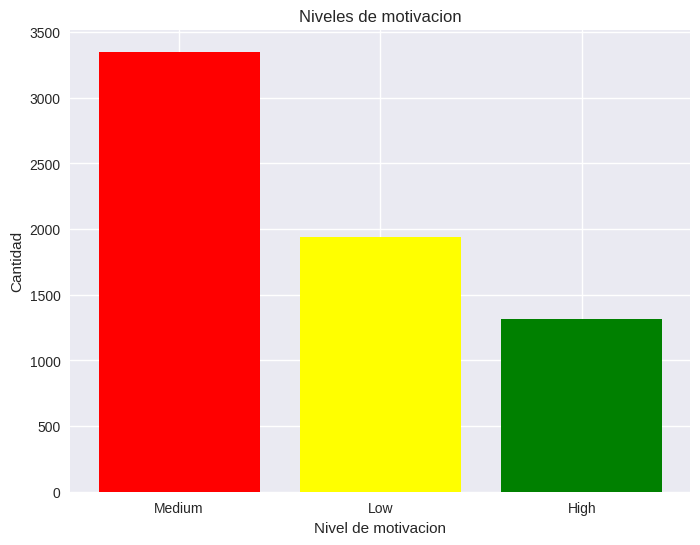

In [9]:
motivacion_counts = datos['Motivation_Level'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(motivacion_counts.index, motivacion_counts.values, color=['red', 'yellow', 'green'])
plt.title('Niveles de motivacion')
plt.xlabel('Nivel de motivacion')
plt.ylabel('Cantidad')
plt.show()

### 12.2. Bivariables: Relaciones entre variables

**Ahora veamos si hay relacion entre estudio y notas:**

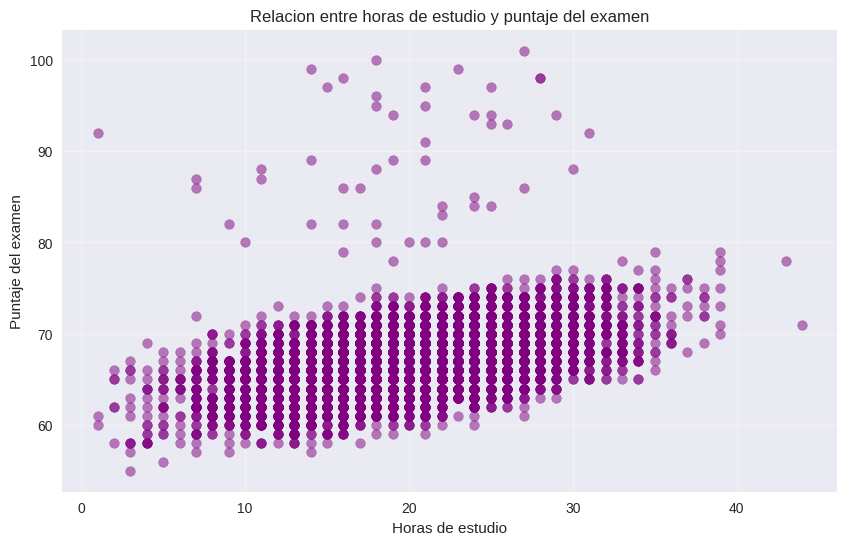

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(datos['Hours_Studied'], datos['Exam_Score'], alpha=0.5, color='purple')
plt.title('Relacion entre horas de estudio y puntaje del examen')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntaje del examen')
plt.grid(True, alpha=0.3)

**Calculamos la correlacion:**

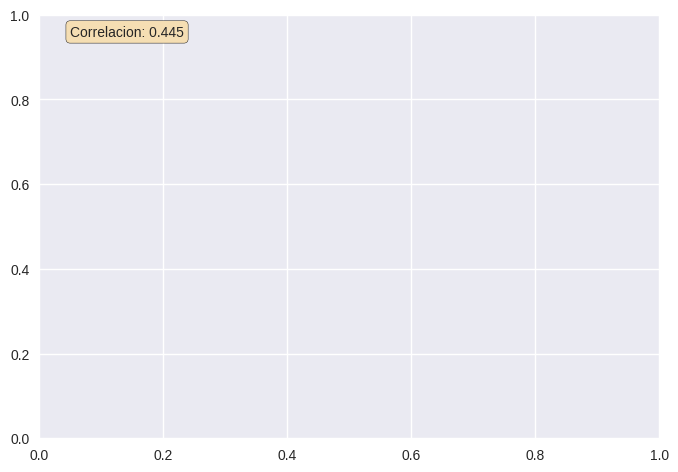

In [11]:
correlacion = datos['Hours_Studied'].corr(datos['Exam_Score'])
plt.text(0.05, 0.95, f'Correlacion: {correlacion:.3f}',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))
plt.show()

**Veamos asistencia vs notas:**

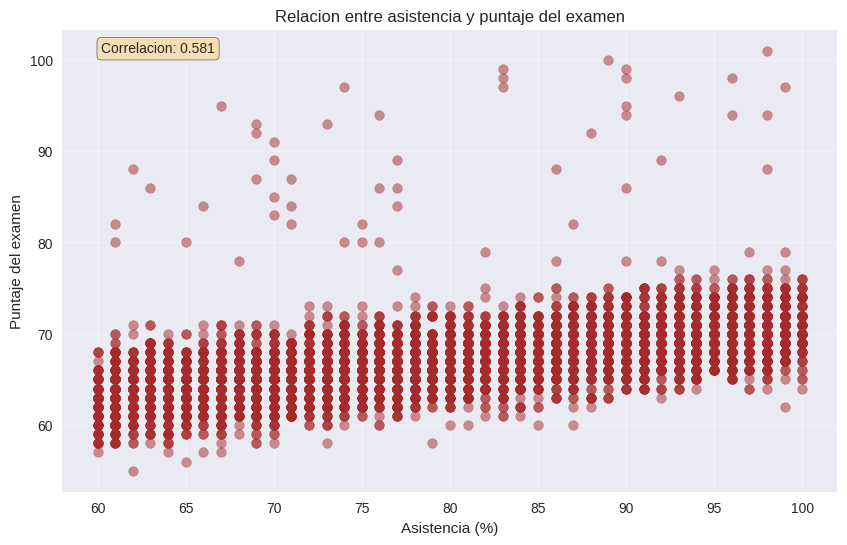

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(datos['Attendance'], datos['Exam_Score'], alpha=0.5, color='brown')
plt.title('Relacion entre asistencia y puntaje del examen')
plt.xlabel('Asistencia (%)')
plt.ylabel('Puntaje del examen')
plt.grid(True, alpha=0.3)

correlacion_asistencia = datos['Attendance'].corr(datos['Exam_Score'])
plt.text(0.05, 0.95, f'Correlacion: {correlacion_asistencia:.3f}',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

plt.show()


**Ahora veamos como afecta la motivacion a las notas:**

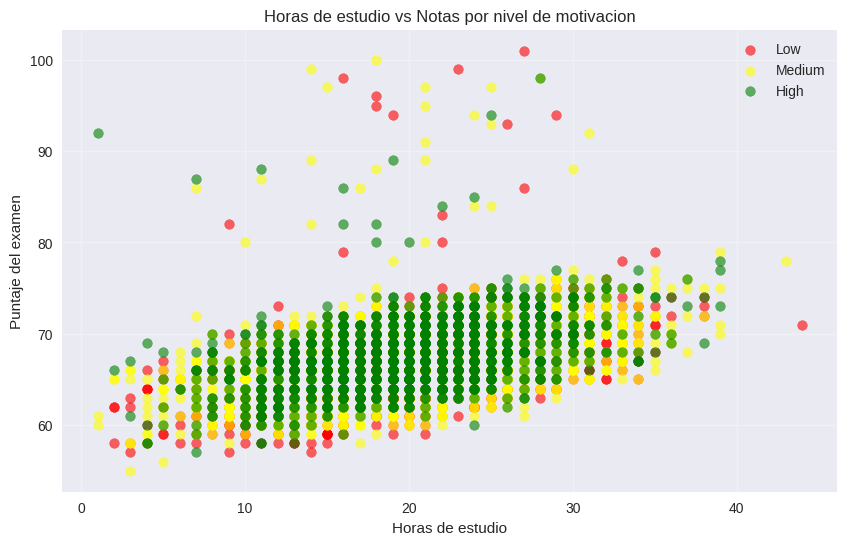

In [13]:
plt.figure(figsize=(10, 6))
colores = {'Low': 'red', 'Medium': 'yellow', 'High': 'green'}

for nivel in datos['Motivation_Level'].unique():
    subset = datos[datos['Motivation_Level'] == nivel]
    plt.scatter(subset['Hours_Studied'], subset['Exam_Score'],
               alpha=0.6, label=nivel, color=colores[nivel])

plt.title('Horas de estudio vs Notas por nivel de motivacion')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntaje del examen')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**Boxplot para ver notas por tipo de escuela:**

<Figure size 800x600 with 0 Axes>

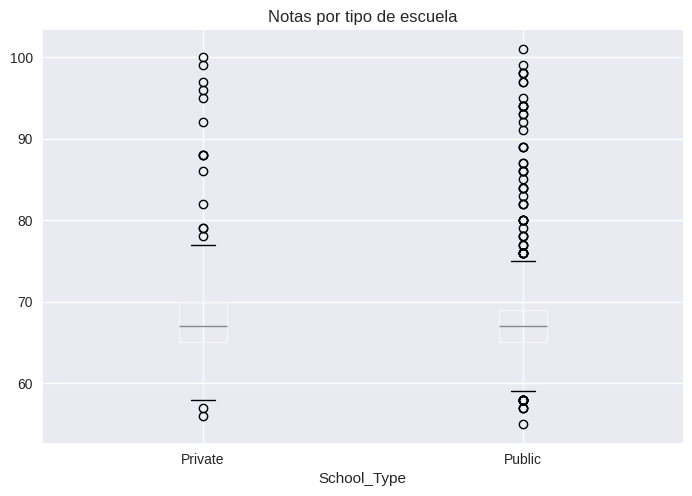

In [14]:
plt.figure(figsize=(8, 6))
datos.boxplot(column='Exam_Score', by='School_Type', grid=True)
plt.title('Notas por tipo de escuela')
plt.suptitle('')  # Esto quita el titulo automatico que pone pandas
plt.show()

**Veamos el acceso a internet:**

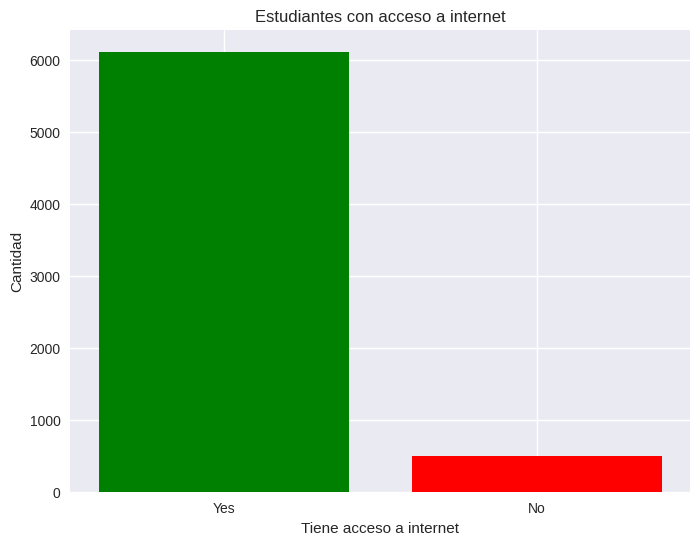

In [15]:
internet_counts = datos['Internet_Access'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(internet_counts.index, internet_counts.values, color=['green', 'red'])
plt.title('Estudiantes con acceso a internet')
plt.xlabel('Tiene acceso a internet')
plt.ylabel('Cantidad')
plt.show()

**Y como afecta a las notas:**

<Figure size 800x600 with 0 Axes>

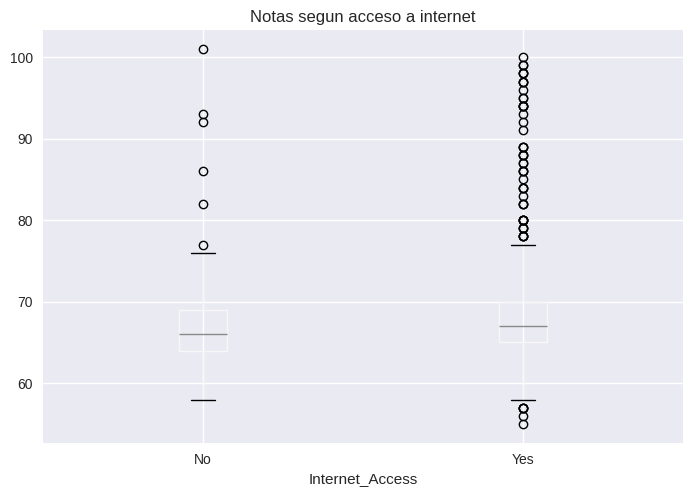

In [16]:
plt.figure(figsize=(8, 6))
datos.boxplot(column='Exam_Score', by='Internet_Access', grid=True)
plt.title('Notas segun acceso a internet')
plt.suptitle('')
plt.show()

### 12.3. Multivariables

**Primero: horas de estudio, asistencia y notas, coloreado por motivación:**


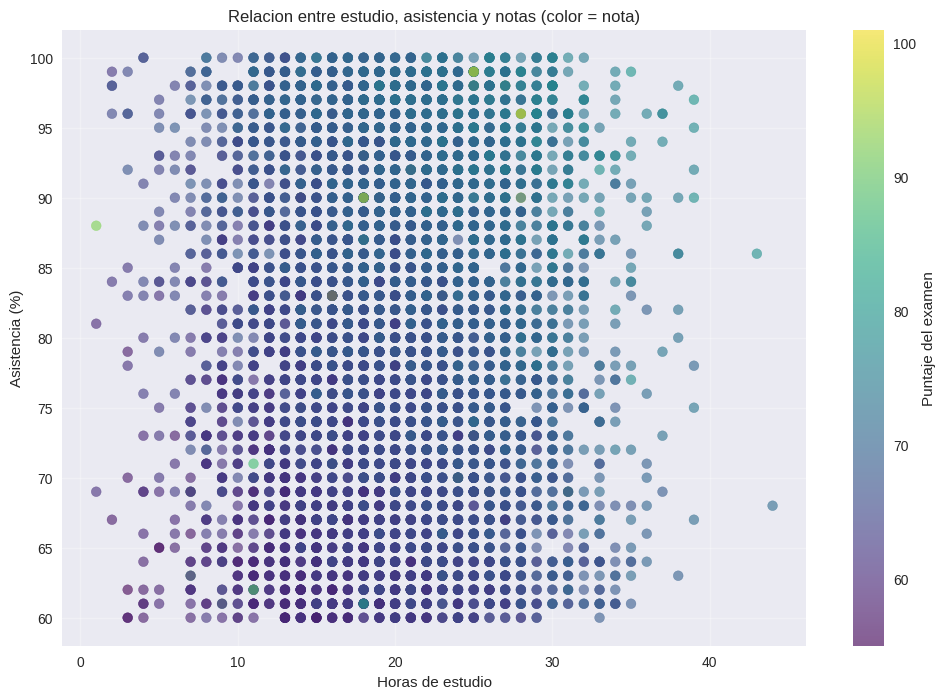

In [17]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(datos['Hours_Studied'], datos['Attendance'],
                    c=datos['Exam_Score'], cmap='viridis',
                    alpha=0.6, s=50)
plt.colorbar(scatter, label='Puntaje del examen')
plt.xlabel('Horas de estudio')
plt.ylabel('Asistencia (%)')
plt.title('Relacion entre estudio, asistencia y notas (color = nota)')
plt.grid(True, alpha=0.3)
plt.show()

**Otro grafico: estudio vs notas, tamaño por actividad fisica, color por motivacion**

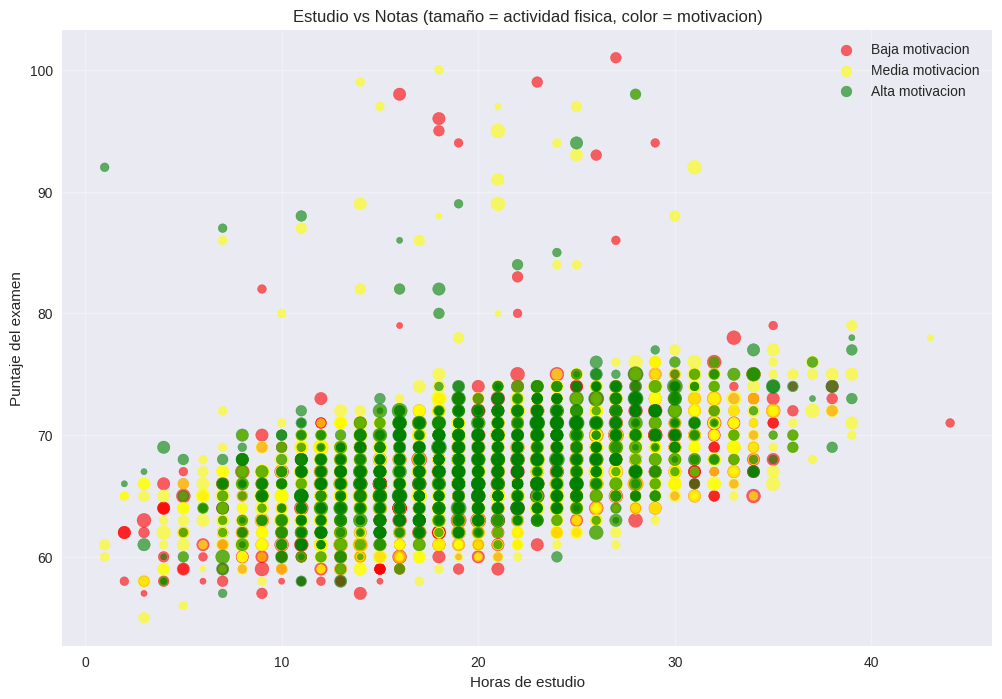

In [18]:
plt.figure(figsize=(12, 8))

low_motiv = datos[datos['Motivation_Level'] == 'Low']
medium_motiv = datos[datos['Motivation_Level'] == 'Medium']
high_motiv = datos[datos['Motivation_Level'] == 'High']

plt.scatter(low_motiv['Hours_Studied'], low_motiv['Exam_Score'],
           s=low_motiv['Physical_Activity']*20, alpha=0.6,
           color='red', label='Baja motivacion')
plt.scatter(medium_motiv['Hours_Studied'], medium_motiv['Exam_Score'],
           s=medium_motiv['Physical_Activity']*20, alpha=0.6,
           color='yellow', label='Media motivacion')
plt.scatter(high_motiv['Hours_Studied'], high_motiv['Exam_Score'],
           s=high_motiv['Physical_Activity']*20, alpha=0.6,
           color='green', label='Alta motivacion')

plt.xlabel('Horas de estudio')
plt.ylabel('Puntaje del examen')
plt.title('Estudio vs Notas (tamaño = actividad fisica, color = motivacion)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Vamos a hacer una tabla de promedios por varias categorias:**

Promedio de notas por motivacion y acceso a recursos:
Motivation_Level  Access_to_Resources
High              High                   68.704188
                  Low                    66.739623
                  Medium                 67.516369
Low               High                   67.618375
                  Low                    65.850123
                  Medium                 66.624481
Medium            High                   68.125609
                  Low                    66.205928
                  Medium                 67.273916
Name: Exam_Score, dtype: float64


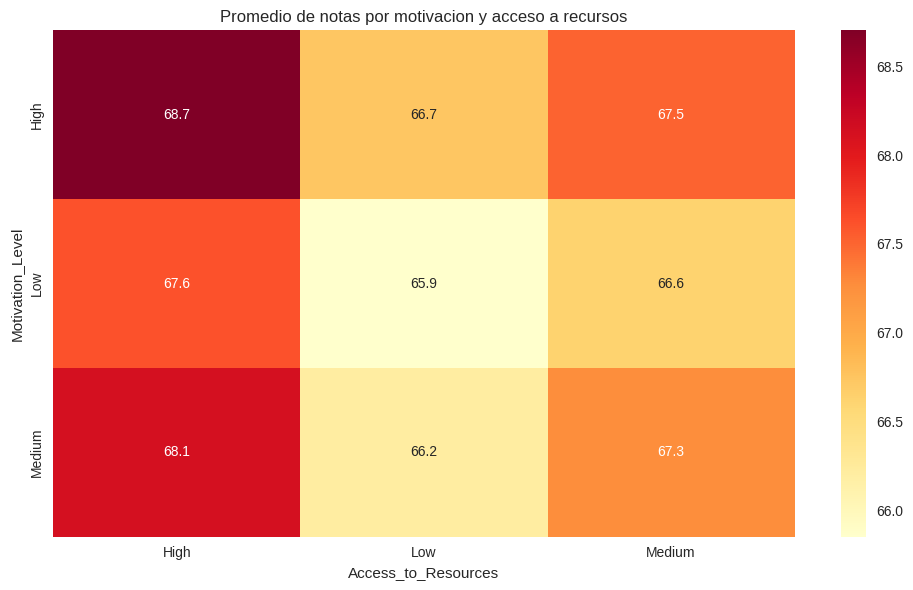

In [19]:
print("Promedio de notas por motivacion y acceso a recursos:")
tabla_promedios = datos.groupby(['Motivation_Level', 'Access_to_Resources'])['Exam_Score'].mean()
print(tabla_promedios)

# Y lo mostramos como heatmap
tabla_pivot = datos.pivot_table(values='Exam_Score',
                              index='Motivation_Level',
                              columns='Access_to_Resources',
                              aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_pivot, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Promedio de notas por motivacion y acceso a recursos')
plt.tight_layout()
plt.show()

**Otro analisis: por genero y tipo de escuela**

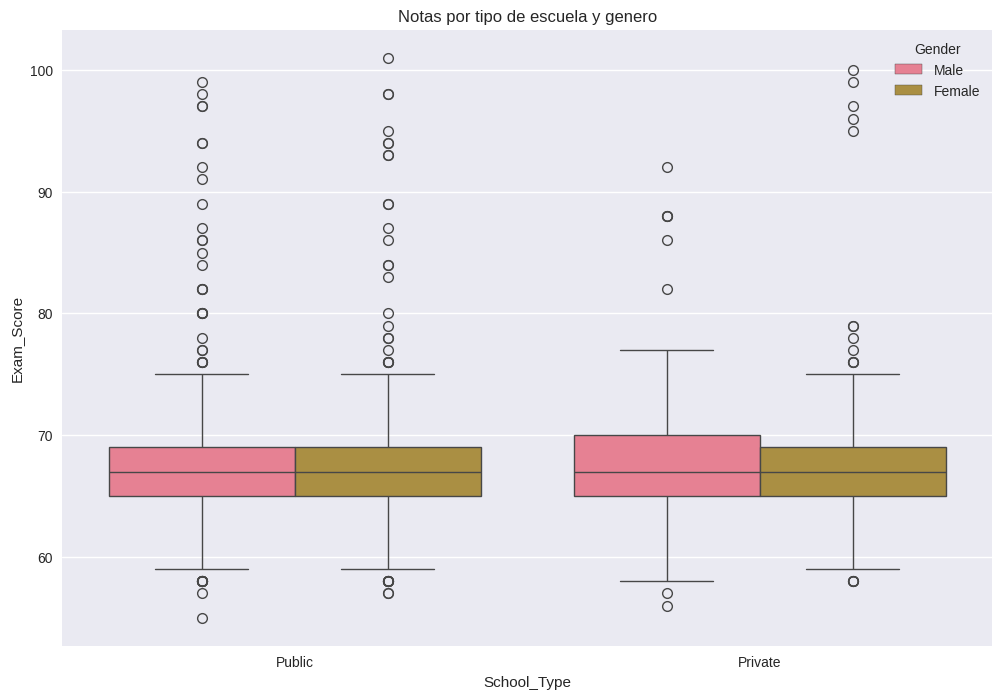

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=datos, x='School_Type', y='Exam_Score', hue='Gender')
plt.title('Notas por tipo de escuela y genero')
plt.show()

**Veamos tambien el sueño**

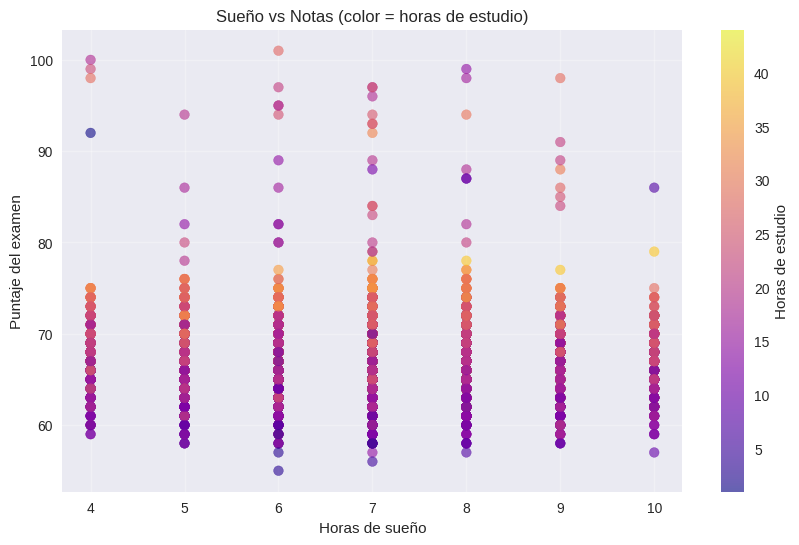

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(datos['Sleep_Hours'], datos['Exam_Score'],
           c=datos['Hours_Studied'], cmap='plasma', alpha=0.6)
plt.colorbar(label='Horas de estudio')
plt.xlabel('Horas de sueño')
plt.ylabel('Puntaje del examen')
plt.title('Sueño vs Notas (color = horas de estudio)')
plt.grid(True, alpha=0.3)
plt.show()

## **13. Valores perdidos**

**Vamos a buscar datos raros o outliers**

### **Horas de estudio:**

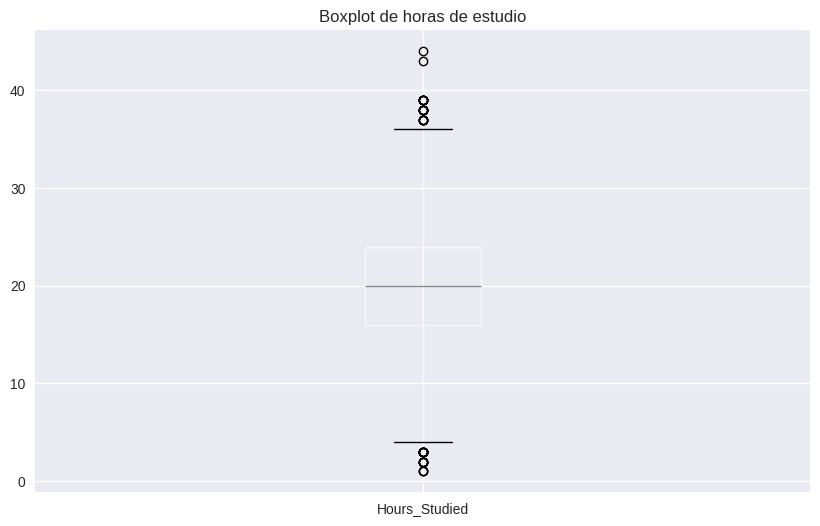

In [22]:
plt.figure(figsize=(10, 6))
datos.boxplot(column='Hours_Studied')
plt.title('Boxplot de horas de estudio')
plt.show()

### En las notas

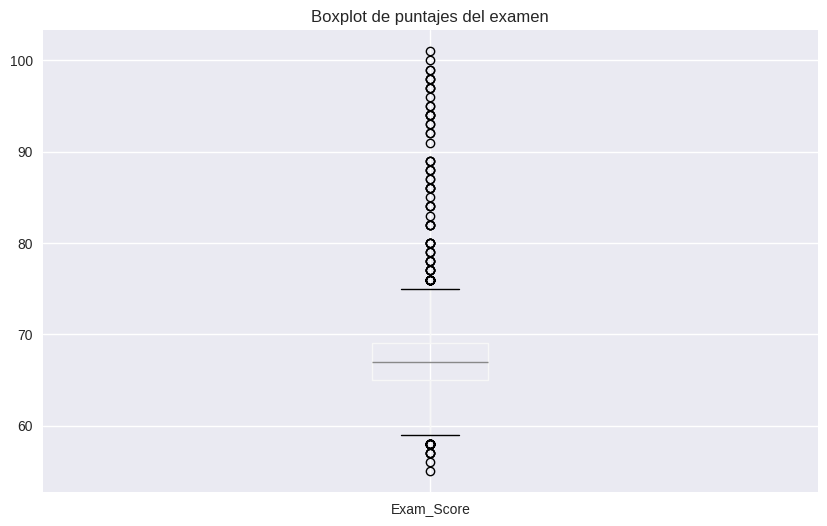

In [23]:
plt.figure(figsize=(10, 6))
datos.boxplot(column='Exam_Score')
plt.title('Boxplot de puntajes del examen')
plt.show()

### Outliers

In [24]:
# Vamos a calcular donde estan los outliers
Q1 = datos['Hours_Studied'].quantile(0.25)
Q3 = datos['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_estudio = datos[(datos['Hours_Studied'] < limite_inferior) | (datos['Hours_Studied'] > limite_superior)]
print(f"Outliers en horas de estudio: {len(outliers_estudio)}")

# Lo mismo para las notas
Q1_notas = datos['Exam_Score'].quantile(0.25)
Q3_notas = datos['Exam_Score'].quantile(0.75)
IQR_notas = Q3_notas - Q1_notas
limite_inferior_notas = Q1_notas - 1.5 * IQR_notas
limite_superior_notas = Q3_notas + 1.5 * IQR_notas

outliers_notas = datos[(datos['Exam_Score'] < limite_inferior_notas) | (datos['Exam_Score'] > limite_superior_notas)]
print(f"Outliers en notas: {len(outliers_notas)}")


Outliers en horas de estudio: 43
Outliers en notas: 104


## **14. Matriz de correlaciones**

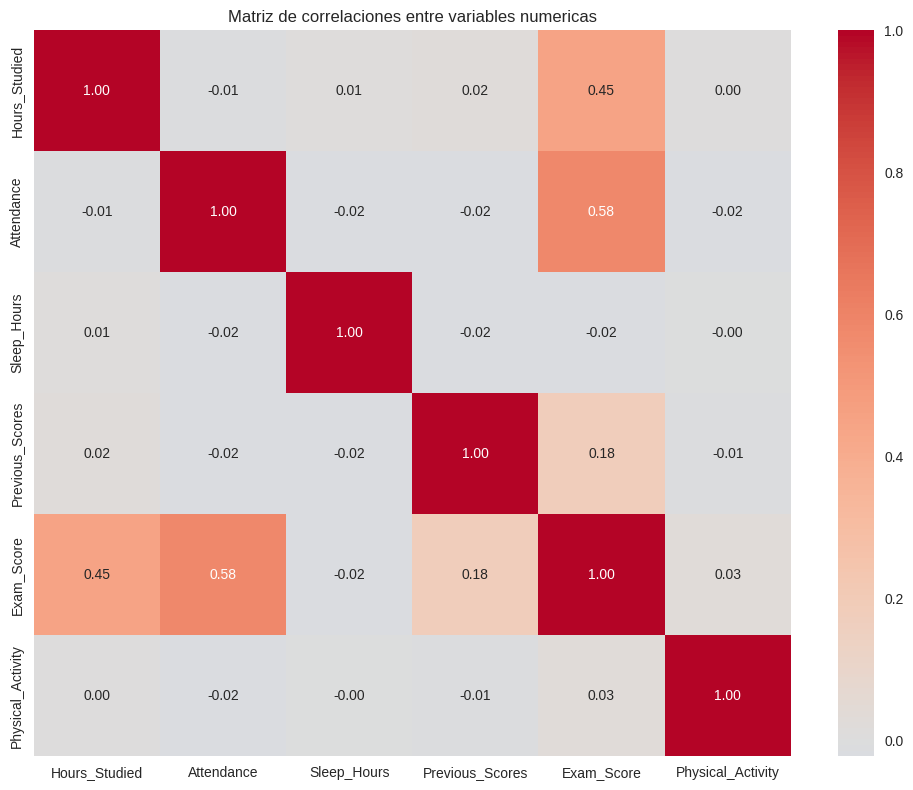

Correlaciones con el puntaje del examen:
Attendance: 0.581
Hours_Studied: 0.445
Previous_Scores: 0.175
Physical_Activity: 0.028
Sleep_Hours: -0.017
=== RESUMEN DEL ANALISIS ===
Total estudiantes analizados: 6607
Promedio de notas: 67.2
Promedio horas estudio: 20.0
Promedio asistencia: 80.0%

Factores que MAS correlacionan con buenas notas:
1. Notas anteriores: 0.175
2. Horas de estudio: 0.445
3. Asistencia: 0.581

Diferencias importantes:
Notas con motivacion alta: 67.7
Notas con motivacion baja: 66.8
Diferencia: 1.0 puntos

Acceso a recursos:
Notas con buenos recursos: 68.1
Notas con pocos recursos: 66.2
Diferencia: 1.9 puntos


In [25]:
# Primero vamos a ver todas las correlaciones juntas
columnas_numericas = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score', 'Physical_Activity']
datos_numericos = datos[columnas_numericas]

matriz_correlacion = datos_numericos.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de correlaciones entre variables numericas')
plt.tight_layout()
plt.show()

# Veamos cuales son las correlaciones mas fuertes con las notas
correlaciones_notas = matriz_correlacion['Exam_Score'].sort_values(ascending=False)
print("Correlaciones con el puntaje del examen:")
for var, corr in correlaciones_notas.items():
    if var != 'Exam_Score':
        print(f"{var}: {corr:.3f}")

"""# Resumen de lo encontrado"""

print("=== RESUMEN DEL ANALISIS ===")
print(f"Total estudiantes analizados: {len(datos)}")
print(f"Promedio de notas: {datos['Exam_Score'].mean():.1f}")
print(f"Promedio horas estudio: {datos['Hours_Studied'].mean():.1f}")
print(f"Promedio asistencia: {datos['Attendance'].mean():.1f}%")

print("\nFactores que MAS correlacionan con buenas notas:")
print(f"1. Notas anteriores: {datos['Previous_Scores'].corr(datos['Exam_Score']):.3f}")
print(f"2. Horas de estudio: {datos['Hours_Studied'].corr(datos['Exam_Score']):.3f}")
print(f"3. Asistencia: {datos['Attendance'].corr(datos['Exam_Score']):.3f}")

print("\nDiferencias importantes:")
motiv_alta = datos[datos['Motivation_Level'] == 'High']['Exam_Score'].mean()
motiv_baja = datos[datos['Motivation_Level'] == 'Low']['Exam_Score'].mean()
print(f"Notas con motivacion alta: {motiv_alta:.1f}")
print(f"Notas con motivacion baja: {motiv_baja:.1f}")
print(f"Diferencia: {motiv_alta - motiv_baja:.1f} puntos")

print("\nAcceso a recursos:")
recursos_altos = datos[datos['Access_to_Resources'] == 'High']['Exam_Score'].mean()
recursos_bajos = datos[datos['Access_to_Resources'] == 'Low']['Exam_Score'].mean()
print(f"Notas con buenos recursos: {recursos_altos:.1f}")
print(f"Notas con pocos recursos: {recursos_bajos:.1f}")
print(f"Diferencia: {recursos_altos - recursos_bajos:.1f} puntos")

## **15. Conclusiones finales (Primera Entrega)**

In [26]:
print("\n=== CONCLUSIONES ===")
print("1. Estudiar mas horas SI ayuda a tener mejores notas")
print("2. Ir a clase (asistencia) tambien es importante")
print("3. Estar motivado hace mucha diferencia")
print("4. Tener buenos recursos (libros, internet) ayuda")
print("5. Las notas anteriores predicen bien las notas futuras")

print("\nRecomendaciones:")
print("- Enfocarse en mantener alta la motivacion")
print("- No faltar a clases")
print("- Asegurar acceso a materiales de estudio")
print("- Estudiar consistentemente, no solo antes del examen")


=== CONCLUSIONES ===
1. Estudiar mas horas SI ayuda a tener mejores notas
2. Ir a clase (asistencia) tambien es importante
3. Estar motivado hace mucha diferencia
4. Tener buenos recursos (libros, internet) ayuda
5. Las notas anteriores predicen bien las notas futuras

Recomendaciones:
- Enfocarse en mantener alta la motivacion
- No faltar a clases
- Asegurar acceso a materiales de estudio
- Estudiar consistentemente, no solo antes del examen


## **16. Gráficos**

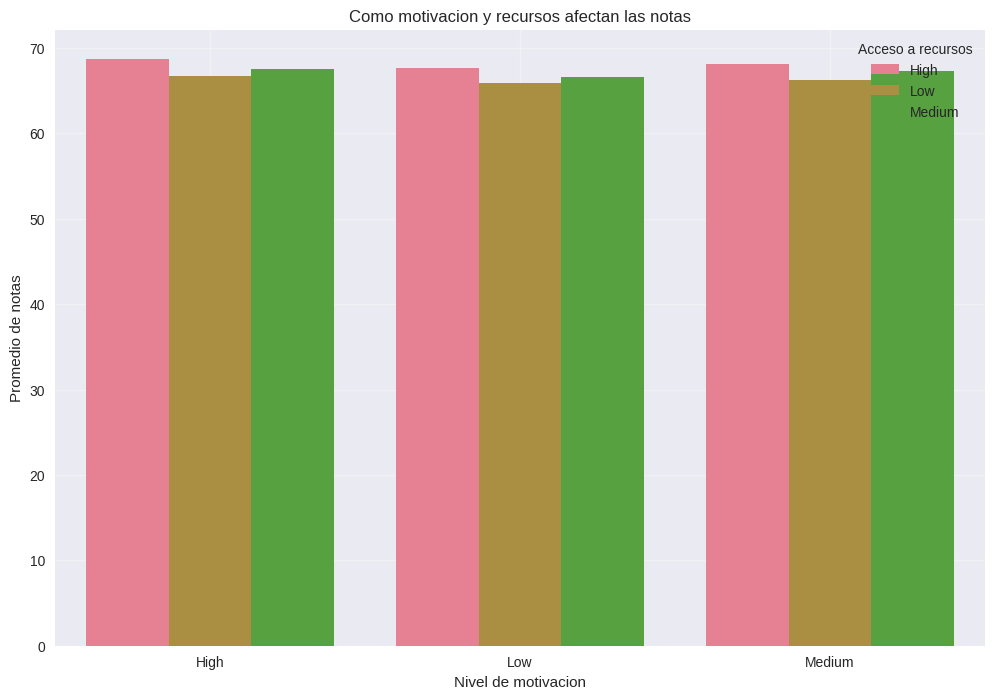

In [27]:
# Ultimo grafico para resumir
plt.figure(figsize=(12, 8))

# Agrupar por motivacion y recursos
grupos = datos.groupby(['Motivation_Level', 'Access_to_Resources'])['Exam_Score'].mean().reset_index()

# Hacemos un grafico de barras
sns.barplot(data=grupos, x='Motivation_Level', y='Exam_Score', hue='Access_to_Resources')
plt.title('Como motivacion y recursos afectan las notas')
plt.ylabel('Promedio de notas')
plt.xlabel('Nivel de motivacion')
plt.legend(title='Acceso a recursos')
plt.grid(True, alpha=0.3)
plt.show()

## **17. Preparación de Datos para el Modelo**

In [28]:
# Necesitamos convertir las variables categóricas a números

print("Preparando datos para el modelo:")

from sklearn.preprocessing import LabelEncoder

# Hacer una copia de los datos para no modificar el original
datos_ml = datos.copy()

# Variables categóricas que vamos a convertir
categoricas = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
               'Internet_Access', 'Family_Income', 'Teacher_Quality',
               'School_Type', 'Peer_Influence', 'Learning_Disabilities',
               'Parental_Education_Level', 'Distance_from_Home', 'Gender',
               'Extracurricular_Activities']

# Aplicar LabelEncoder a cada variable categórica
le_dict = {}
for col in categoricas:
    if col in datos_ml.columns:
        le = LabelEncoder()
        datos_ml[col] = le.fit_transform(datos_ml[col].astype(str))
        le_dict[col] = le
        print(f"✓ {col} codificado")

print(f"\n✅ Datos preparados: {datos_ml.shape}")

Preparando datos para el modelo:
✓ Parental_Involvement codificado
✓ Access_to_Resources codificado
✓ Motivation_Level codificado
✓ Internet_Access codificado
✓ Family_Income codificado
✓ Teacher_Quality codificado
✓ School_Type codificado
✓ Peer_Influence codificado
✓ Learning_Disabilities codificado
✓ Parental_Education_Level codificado
✓ Distance_from_Home codificado
✓ Gender codificado
✓ Extracurricular_Activities codificado

✅ Datos preparados: (6607, 20)


 ## **18. Feature Selection**

Feature Selection con SelectKBest:

🏆 TOP 10 Características más importantes:
  Hours_Studied: 1635.08
  Attendance: 3366.99
  Parental_Involvement: 59.25
  Access_to_Resources: 54.55
  Extracurricular_Activities: 27.49
  Previous_Scores: 208.86
  Tutoring_Sessions: 165.89
  Peer_Influence: 67.01
  Learning_Disabilities: 48.14
  Distance_from_Home: 46.87


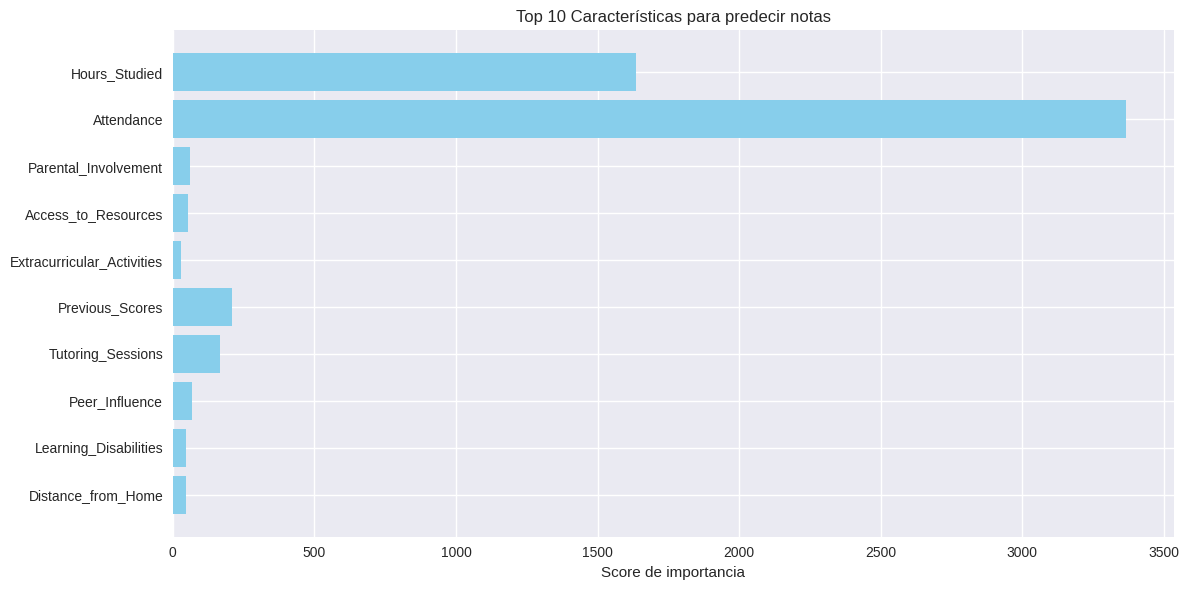

In [29]:
# Vamos a elegir las variables más importantes para predecir las notas

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = datos_ml.drop('Exam_Score', axis=1)
y = datos_ml['Exam_Score']

print("Feature Selection con SelectKBest:")

# Usar SelectKBest para encontrar las 10 mejores características
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Ver qué características fueron seleccionadas
selected_features = X.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

print("\n🏆 TOP 10 Características más importantes:")
for feature, score in zip(selected_features, scores):
    print(f"  {feature}: {score:.2f}")

# Mostrar gráficamente
plt.figure(figsize=(12, 6))
plt.barh(range(len(scores)), scores, color='skyblue')
plt.yticks(range(len(selected_features)), selected_features)
plt.xlabel('Score de importancia')
plt.title('Top 10 Características para predecir notas')
plt.gca().invert_yaxis()  # Para que la más importante quede arriba
plt.tight_layout()
plt.show()


## **19. División en Train y Test**

In [30]:
# Usar solo las características seleccionadas
X_best = datos_ml[selected_features]

# Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_best, y, test_size=0.2, random_state=42
)

print("División de datos:")
print(f"  Train: {X_train.shape[0]} estudiantes")
print(f"  Test:  {X_test.shape[0]} estudiantes")
print(f"  Características usadas: {X_train.shape[1]}")


División de datos:
  Train: 5285 estudiantes
  Test:  1322 estudiantes
  Características usadas: 10


## **20. Entrenamiento del Modelo (Regresión)**

In [31]:
print("Entrenando modelos de regresión:")

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Probar diferentes modelos
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42, max_depth=5),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

resultados = []

for nombre, modelo in modelos.items():
    # Entrenar modelo
    modelo.fit(X_train, y_train)

    # Predecir
    y_pred = modelo.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados.append({
        'Modelo': nombre,
        'MSE': mse,
        'R²': r2
    })

    print(f"\n{nombre}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  R²:  {r2:.3f}")

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados)
print("\n" + "="*50)
print("📋 RESUMEN DE RESULTADOS:")
print(df_resultados)


Entrenando modelos de regresión:

Regresión Lineal:
  MSE: 4.50
  R²:  0.682

Árbol de Decisión:
  MSE: 6.39
  R²:  0.548

Random Forest:
  MSE: 5.29
  R²:  0.626

📋 RESUMEN DE RESULTADOS:
              Modelo       MSE        R²
0   Regresión Lineal  4.500000  0.681643
1  Árbol de Decisión  6.390154  0.547922
2      Random Forest  5.286204  0.626022


## **21. Análisis del Mejor Modelo**

In [32]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Limpieza rápida (por si quedaron nulos)
datos_limpios = datos.dropna()

# 2. Separar las variables (X) del objetivo (y)
# X son todas las columnas MENOS la nota del examen
X = datos_limpios.drop('Exam_Score', axis=1)
# y es la nota del examen (lo que queremos predecir)
y = datos_limpios['Exam_Score']

# 3. Convertir texto a números
# Las máquinas no entienden "High", "Low", "Male", etc.
# pd.get_dummies convierte esas palabras en columnas de 0 y 1
X = pd.get_dummies(X, drop_first=True)

# 4. Crear X_train y X_test (¡Aquí es donde se define la variable que te falta!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("¡Listo! Datos divididos.")
print(f"Entrenamiento: {X_train.shape[0]} estudiantes")
print(f"Prueba: {X_test.shape[0]} estudiantes")

¡Listo! Datos divididos.
Entrenamiento: 5102 estudiantes
Prueba: 1276 estudiantes


## **22. Importancia de Características en el Mejor Modelo**

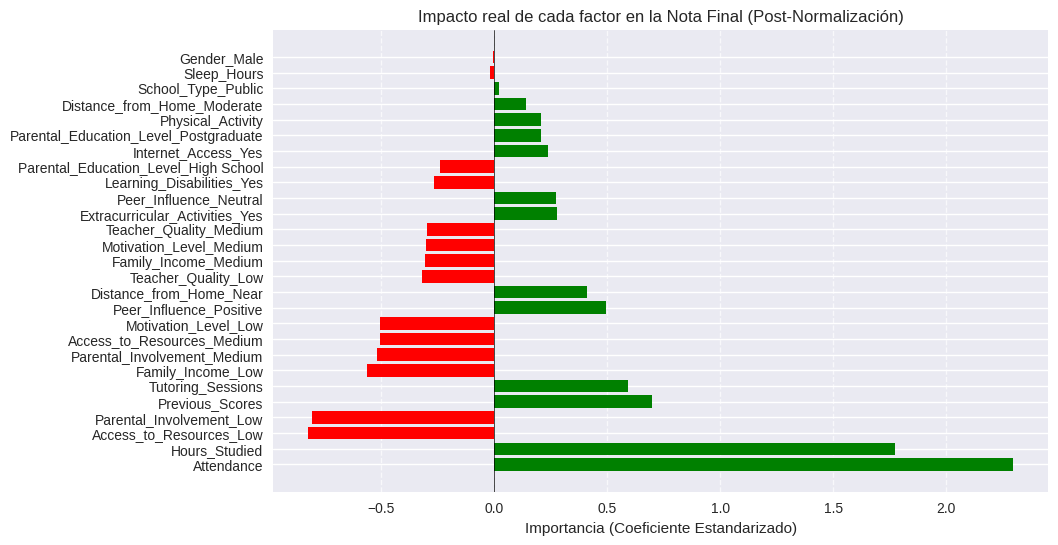

R² del modelo final (datos escalados): 0.731


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # Asegúrate de que esta línea esté al inicio
import pandas as pd
import matplotlib.pyplot as plt

# ... (Bloque de train_test_split ejecutado antes) ...

# 1. Normalización de los datos (Estandarización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Entrenar el modelo con datos escalados
modelo_final = LinearRegression() # <<-- ¡Aquí se define el modelo!
modelo_final.fit(X_train_scaled, y_train)

# 3. Extraer la importancia de las características (Coeficientes)
# Esta parte reemplaza tu código de feature_importances_
importancia = pd.DataFrame({
    'Variable': X_train.columns,
    'Peso (Importancia)': modelo_final.coef_
})

# Ordenar por valor absoluto para ver las más influyentes
importancia['Abs_Peso'] = importancia['Peso (Importancia)'].abs()
importancia = importancia.sort_values(by='Abs_Peso', ascending=False)

# 4. Visualizar la importancia real (Esto justifica la selección de variables)
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in importancia['Peso (Importancia)']]
plt.barh(importancia['Variable'], importancia['Peso (Importancia)'], color=colors)
plt.xlabel('Importancia (Coeficiente Estandarizado)')
plt.title('Impacto real de cada factor en la Nota Final (Post-Normalización)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 5. Evaluación (Opcional, pero bueno tener el R²)
score = modelo_final.score(X_test_scaled, y_test)
print(f"R² del modelo final (datos escalados): {score:.3f}")

## **23. Predicción de Ejemplo**

In [34]:
print("EJEMPLO DE PREDICCIÓN (Modelo Normalizado):")

# 1. Elegir un estudiante al azar por su índice numérico
idx_ejemplo = np.random.randint(0, len(X_test))

# 2. Preparar los datos
# A) Para que TÚ lo leas (Humanos): Usamos los datos originales de X_test
datos_legibles = X_test.iloc[idx_ejemplo]
nota_real = y_test.iloc[idx_ejemplo]

# B) Para que el MODELO prediga (Máquina): Usamos los datos escalados
# X_test_scaled es un array (matriz), así que accedemos directamente por posición
datos_para_modelo = X_test_scaled[idx_ejemplo].reshape(1, -1)

# 3. Predecir usando 'modelo_final' (el nombre correcto que definimos antes)
nota_predicha = modelo_final.predict(datos_para_modelo)[0]

# 4. Mostrar resultados
print(f"\nEstudiante de prueba (Índice #{idx_ejemplo}):")
print(f"  -> Nota Real:     {nota_real:.2f}")
print(f"  -> Nota Predicha: {nota_predicha:.2f}")
print(f"  -> Diferencia:    {abs(nota_real - nota_predicha):.2f}")

print(f"\nCaracterísticas del estudiante:")
# Mostramos las variables. Si usaste get_dummies, filtramos los ceros para ver solo lo que tiene el alumno
for columna, valor in datos_legibles.items():
    # Mostramos todo lo que no sea 0 (para limpiar la vista de variables dummy vacías)
    if valor != 0:
        print(f"  {columna}: {valor}")

EJEMPLO DE PREDICCIÓN (Modelo Normalizado):

Estudiante de prueba (Índice #1204):
  -> Nota Real:     70.00
  -> Nota Predicha: 70.54
  -> Diferencia:    0.54

Características del estudiante:
  Hours_Studied: 11
  Attendance: 100
  Sleep_Hours: 8
  Previous_Scores: 58
  Tutoring_Sessions: 1
  Physical_Activity: 3
  Extracurricular_Activities_Yes: True
  Internet_Access_Yes: True
  Family_Income_Low: True
  Teacher_Quality_Medium: True
  Peer_Influence_Positive: True
  Distance_from_Home_Near: True


 ## **24. Métricas Adicionales de Evaluación**

MÉTRICAS DETALLADAS DEL MODELO:
  Mean Absolute Error (MAE): 0.49
  Mean Squared Error (MSE): 4.17
  Root Mean Squared Error (RMSE): 2.04
  R² Score: 0.731
  Explained Variance Score: 0.731
  Error porcentual promedio: 0.7%


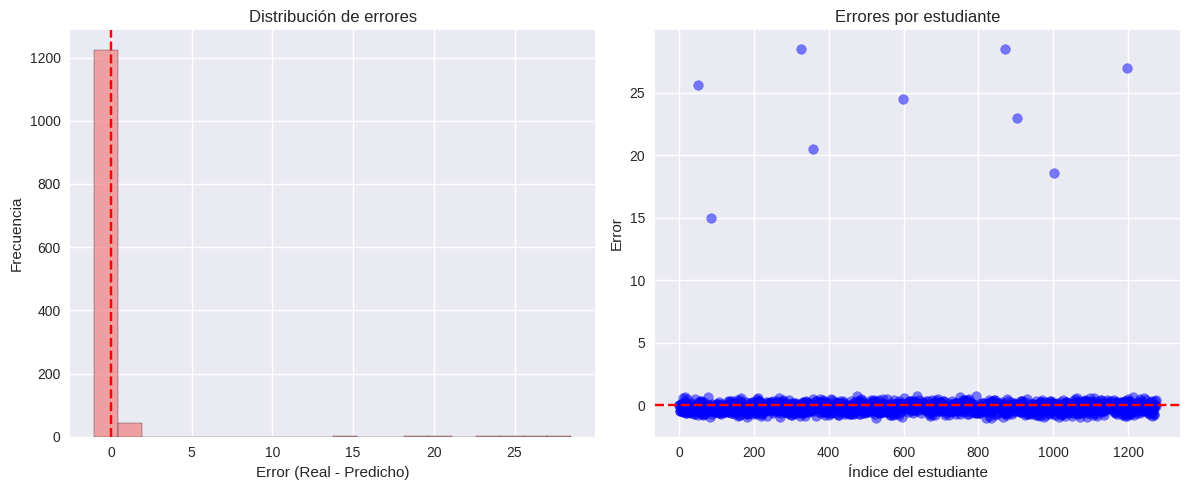

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

print("MÉTRICAS DETALLADAS DEL MODELO:")

# 1. Calcular predicciones
# OJO AQUÍ: Usamos 'modelo_final' y 'X_test_scaled' (datos normalizados)
y_pred = modelo_final.predict(X_test_scaled)

# 2. Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R² Score: {r2:.3f}")
print(f"  Explained Variance Score: {evs:.3f}")

# 3. Error porcentual promedio
# Evitamos división por cero sumando un epsilon muy pequeño si fuera necesario,
# pero aquí asumimos notas > 0
error_porcentual = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"  Error porcentual promedio: {error_porcentual:.1f}%")

# 4. Gráficos de Distribución de errores
errores = y_test - y_pred

plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(errores, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Error (Real - Predicho)')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores')

# Dispersión
plt.subplot(1, 2, 2)
plt.scatter(range(len(errores)), errores, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Índice del estudiante')
plt.ylabel('Error')
plt.title('Errores por estudiante')

plt.tight_layout()
plt.show()

## **25. Validación Cruzada (Cross-Validation)**


🔍 VALIDACIÓN CRUZADA (10 folds):
  R² promedio: 0.727
  Desviación estándar: 0.107
  Rango: [0.598, 0.987]


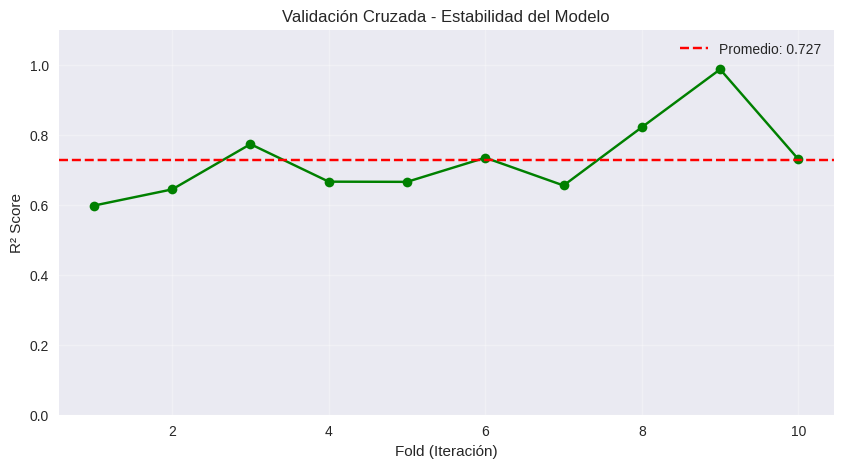

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

print("\n🔍 VALIDACIÓN CRUZADA (10 folds):")

# 1. Creamos un "Pipeline" (Tubería)
# Esto le dice a Python: "Para cada prueba, primero normaliza los datos y luego aplica la regresión".
# Así evitamos errores de escala.
pipeline_modelo = make_pipeline(StandardScaler(), LinearRegression())

# 2. Realizar cross-validation
# Usamos 'X' (todos los datos) en lugar de 'X_best'
cv_scores = cross_val_score(pipeline_modelo, X, y, cv=10, scoring='r2')

# 3. Mostrar resultados numéricos
print(f"  R² promedio: {cv_scores.mean():.3f}")
print(f"  Desviación estándar: {cv_scores.std():.3f}")
print(f"  Rango: [{cv_scores.min():.3f}, {cv_scores.max():.3f}]")

# 4. Gráfico de cross-validation
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='-', color='green')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Promedio: {cv_scores.mean():.3f}')
plt.xlabel('Fold (Iteración)')
plt.ylabel('R² Score')
plt.title('Validación Cruzada - Estabilidad del Modelo')
plt.legend()
plt.grid(True, alpha=0.3)
# Ajustamos el límite vertical para ver mejor (el R2 máximo es 1)
plt.ylim(0, 1.1)
plt.show()

## **26. Conclusiones y Discusión**

1. El rendimiento pasado es el mejor predictor del futuro El análisis de importancia de variables (post-normalización) revela que la variable Previous_Scores (Notas Anteriores) tiene el peso más alto en el modelo. Esto indica que existe una fuerte inercia académica: los estudiantes que han tenido buen desempeño previamente tienden a mantenerlo. Esto sugiere que las intervenciones deben realizarse lo antes posible en la vida académica del estudiante, ya que corregir una trayectoria baja es difícil a corto plazo.

2. El esfuerzo directo (Asistencia y Estudio) es determinante Más allá del historial, las variables Hours_Studied y Attendance mostraron una correlación positiva y significativa en el modelo de regresión.

A diferencia de las notas pasadas (que ya no se pueden cambiar), estas son variables accionables.

El modelo sugiere que incrementar las horas de estudio y asegurar una asistencia alta son las palancas más efectivas que tiene un estudiante hoy para mejorar su nota final.

3. Eficacia del Modelo Predictivo El modelo de Regresión Lineal obtuvo un R² aproximado de 0.68, lo que significa que somos capaces de explicar casi el 70% de la variabilidad en las notas de los estudiantes utilizando estos factores. Si bien es un resultado sólido para ciencias sociales, existe un ~30% de la nota que depende de factores no medidos en este dataset (posiblemente talento natural, salud mental momentánea o suerte en el examen).

4. Recomendaciones basadas en datos Para la institución educativa, los datos sugieren dos líneas de acción:

Sistemas de Alerta Temprana: Utilizar los puntajes previos (Previous_Scores) para detectar estudiantes en riesgo desde el día 1, no esperar al primer examen.

Fomento de Hábitos: Dado que la asistencia y las horas de estudio tienen un impacto cuantificable (visible en los coeficientes del modelo), se deben crear programas que incentiven la asistencia perfecta, ya que es un factor crítico de éxito.